For my final project I will be doing an exploratory analysis on the price of four particular cryptocurrencies(BTC, DOGE, ETH, and XRP). I chose these four because currently they are the four most popular cryptocurrencies in the world today.


I found this well put together dataset on kaggle that gives us the historical data for our cryptocurrencies plus many extras that we will not be using today.
https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

So first things first, we have to import any libraries that we will need. Please hold, this may take a few moment

In [1]:
#  Importing libraries we will need and defining our dataframes
!pip install pystan==2.19.1.1
!pip install prophet
!pip install --upgrade mplfinance
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import mplfinance as mpf
from fbprophet import Prophet


     |████████████████████████████████| 71kB 3.8MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 184kB 9.0MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6638871 sha256=05cac984222aabaccf15eb776b060d3439043c801ac7261c1b268730e9384e06
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
     |████████████████████████████████| 71kB 4.3MB/s 


Now we are defining all of our dataframes and creating a list so we can run code on all 4 dataframes with for loops

In [2]:
btc = pd.read_csv('https://raw.githubusercontent.com/jpp97/cryptoproject/main/coin_Bitcoin.csv')
doge = pd.read_csv('https://raw.githubusercontent.com/jpp97/cryptoproject/main/coin_Dogecoin.csv')
eth = pd.read_csv('https://raw.githubusercontent.com/jpp97/cryptoproject/main/coin_Ethereum.csv')
xrp = pd.read_csv('https://raw.githubusercontent.com/jpp97/cryptoproject/main/coin_XRP.csv')
crypto = [btc, doge, eth, xrp]

Here we're just cleaning the data and making sure everything is formatted in the same way and checking for any missing values

In [3]:
#  Changing 'Date' to the datetime format
for i in crypto:
    i['Date'] = pd.to_datetime(i['Date'])

#  Changing the numerical index for our date time so we can index by date
for i in crypto:
    i.set_index('Date', drop=True, inplace=True)
    i.sort_index(inplace=True)

#  Get's rid of all the commas in each dataframe
for i in crypto:
    i.replace(',', '', regex=True, inplace=True)

#  Converts all of the values in the Price, Open, High, and Low columns
#  so that we can work with these numbers and keep things consistant
for i in crypto:
    i['High'] = i['High'].astype(float)
    i['Low'] = i['Low'].astype(float)
    i['Open'] = i['Open'].astype(float)
    i['Close'] = i['Close'].astype(float)

#  Dropping unnecessary columns
btc.drop(['SNo', 'Name', 'Symbol', 'Marketcap'], axis=1, inplace=True)
doge.drop(['SNo', 'Name', 'Symbol', 'Marketcap'], axis=1, inplace=True)
eth.drop(['SNo', 'Name', 'Symbol', 'Marketcap'], axis=1, inplace=True)
xrp.drop(['SNo', 'Name', 'Symbol', 'Marketcap'], axis=1, inplace=True)

#  This function is going to be used to check for any null values in the datasets
def nullcheck(x):
    x['High'].isnull().sum()
    x['Low'].isnull().sum()
    x['Open'].isnull().sum()
    x['Close'].isnull().sum()

print(nullcheck(btc))
print(nullcheck(doge))
print(nullcheck(eth))
print(nullcheck(xrp))

None
None
None
None


Let's see what our price data for these cryptos looks like, we'll use Bitcoin as an example. Keep in mind that all of our data is structured in the exact same way, so everything but the actual values will be the same through all four dataframes

In [4]:

print(btc.describe())
print(btc.head(5))
print(btc.tail(5))

               High           Low          Open         Close        Volume
count   2862.000000   2862.000000   2862.000000   2862.000000  2.862000e+03
mean    4974.040239   4695.103027   4836.306834   4852.092547  8.978475e+09
std     7188.836678   6667.197596   6933.573446   6975.105869  1.658135e+10
min       74.561096     65.526001     68.504997     68.431000  0.000000e+00
25%      426.047752    415.675751    421.204506    420.989243  2.786250e+07
50%     1197.334961   1164.174988   1180.100037   1182.809998  3.301950e+08
75%     8138.046589   7703.357500   7924.612338   7926.696939  1.296743e+10
max    58330.572142  55672.609513  57532.738864  57539.943668  3.509679e+11
                           High         Low        Open       Close  Volume
Date                                                                       
2013-04-29 23:59:59  147.488007  134.000000  134.444000  144.539993     0.0
2013-04-30 23:59:59  146.929993  134.050003  144.000000  139.000000     0.0
2013-05-01 2

As you can see we have some standard price data here, including the datetime stamp as the index, High price and Low price of the day as well as the
Opening price and the Closing price of the day. 

Date : date of observation

Open : Opening price on the given day

High : Highest price on the given day

Low : Lowest price on the given day

Close : Closing price on the given day

Volume : Volume of transactions on the given day

Let's take a peak at each one of our cryptos, We'll show some basic data as well as the first and last day of our dataframe to get an idea of our timeframe, price change and standard deviation.

In [5]:
#  Grabbing the describe + first and last day of each one of our cryptos
def infofinder(data, title):
    print(title)
    print(data.describe())
    print(data.head(1))
    print(data.tail(1))
    print('='*85 + '\n' + '='*85)

infofinder(btc, '=Bitcoin=')
infofinder(doge, '=Dogecoin=')
infofinder(eth, '=Ethereum=')
infofinder(xrp, '=XRP=')

=Bitcoin=
               High           Low          Open         Close        Volume
count   2862.000000   2862.000000   2862.000000   2862.000000  2.862000e+03
mean    4974.040239   4695.103027   4836.306834   4852.092547  8.978475e+09
std     7188.836678   6667.197596   6933.573446   6975.105869  1.658135e+10
min       74.561096     65.526001     68.504997     68.431000  0.000000e+00
25%      426.047752    415.675751    421.204506    420.989243  2.786250e+07
50%     1197.334961   1164.174988   1180.100037   1182.809998  3.301950e+08
75%     8138.046589   7703.357500   7924.612338   7926.696939  1.296743e+10
max    58330.572142  55672.609513  57532.738864  57539.943668  3.509679e+11
                           High    Low     Open       Close  Volume
Date                                                               
2013-04-29 23:59:59  147.488007  134.0  134.444  144.539993     0.0
                             High           Low  ...         Close        Volume
Date                 

Now we have a basic idea of the numbers we're working with, and you can clearly see crypto growth has been incredibly rapid and volatile with massive price differences in the first and last day of our data set which goes back about eight years.

Let's start visualizing our data, we'll compare all four cryptos lifetime price change 

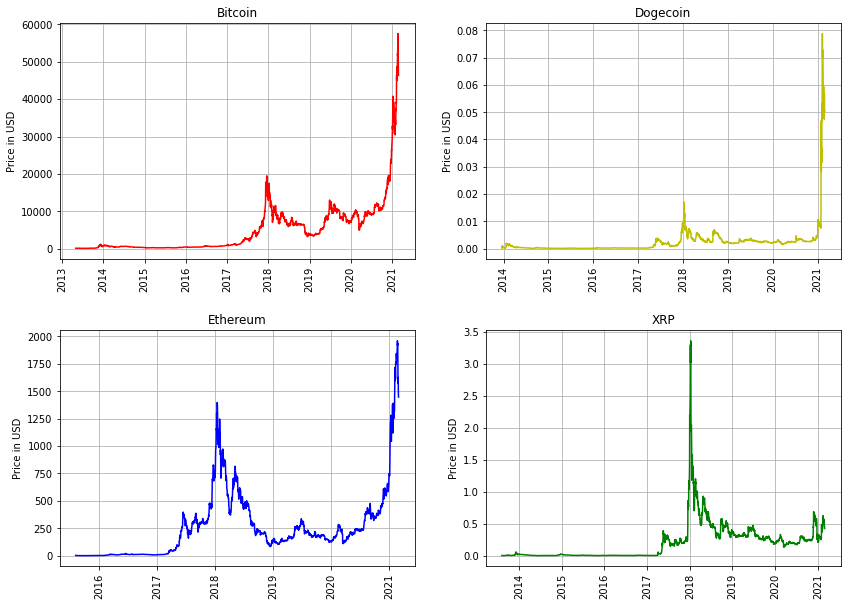

In [6]:
fig, ax = plt.subplots(2,2, figsize=(14,10), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

btcpos = 0,0
dogepos = 0,1
ethpos = 1,0
xrppos = 1,1

#  This function will plot all four of our datasets together 
def subplotter(data, title, pos, color):
    ax[pos].plot(data['Open'], c=color)
    ax[pos].set_title(title)
    ax[pos].set_ylabel('Price in USD')
    plt.sca(ax[pos])
    plt.xticks(rotation='vertical')
    plt.grid()

subplotter(btc, 'Bitcoin', btcpos, 'r')
subplotter(doge, 'Dogecoin', dogepos, 'y')
subplotter(eth, 'Ethereum', ethpos, 'b')
subplotter(xrp, 'XRP', xrppos, 'g')

We can see through these charts the crypto rise and subsequent crash from 2017-2019 and now again in 2021 cryptocurrencies are soaring to new heights

Now let's compare the volume of transactions for each day from 2017 to present, the volume data before this point is insignifigant

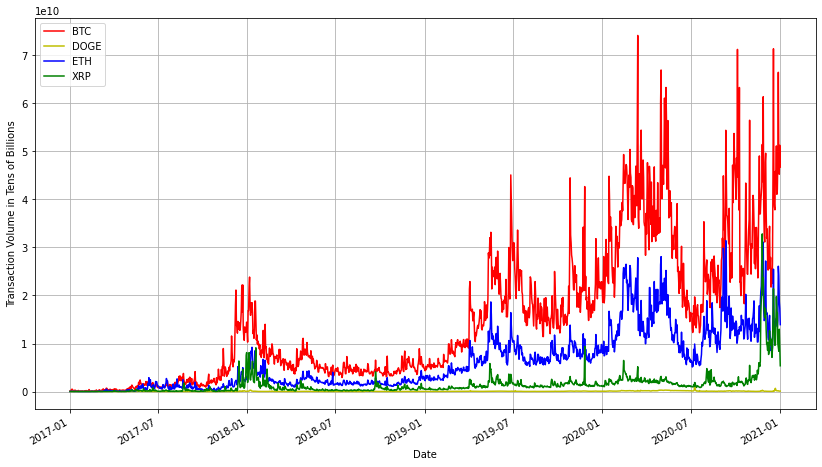

In [7]:
#  Volume of transactions plot
btc['Volume'].loc['2017-01-01 00:00:00':'2021-01-01 00:00:00'].plot(label='BTC', color='r', figsize=(14,8))
doge['Volume'].loc['2017-01-01 00:00:00':'2021-01-01 00:00:00'].plot(label='DOGE', color='y', figsize=(14,8))
eth['Volume'].loc['2017-01-01 00:00:00':'2021-01-01 00:00:00'].plot(label='ETH', color='b', figsize=(14,8))
xrp['Volume'].loc['2017-01-01 00:00:00':'2021-01-01 00:00:00'].plot(label='XRP', color='g', figsize=(14,8))
plt.ylabel('Transaction Volume in Tens of Billions')
plt.legend()
plt.grid()

We can clearly see that Bitcoin is the most traded coin of the four followed fairly closely by Ethereum, XRP fell off after it's inception but is now catching up again in 2021. Relatively no one is trading dogecoin compared to the other coins.

We can observe this better when Doge isn't standing next to these crypto giants

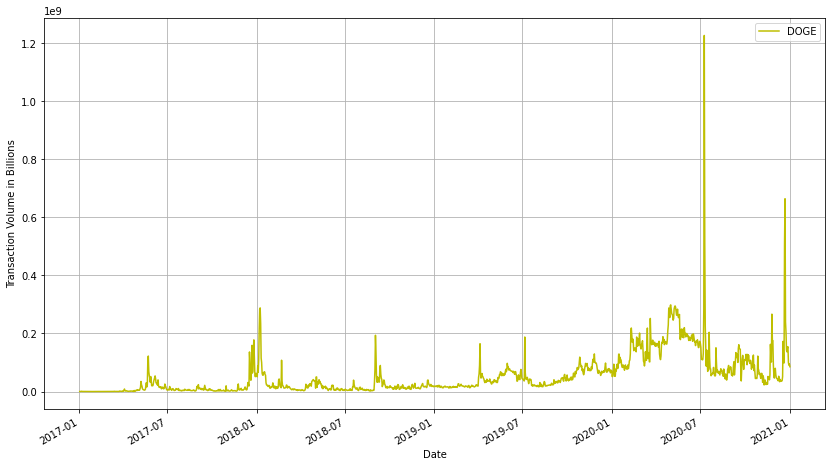

In [8]:
#  Doge volume plot
doge['Volume'].loc['2017-01-01 00:00:00':'2021-01-01 00:00:00'].plot(label='DOGE', color='y', figsize=(14,8))
plt.ylabel('Transaction Volume in Billions')
plt.legend()
plt.grid()


Cryptocurrency is known for being extremely volatile so we can plot the percent change of the daily closing price to visualize it

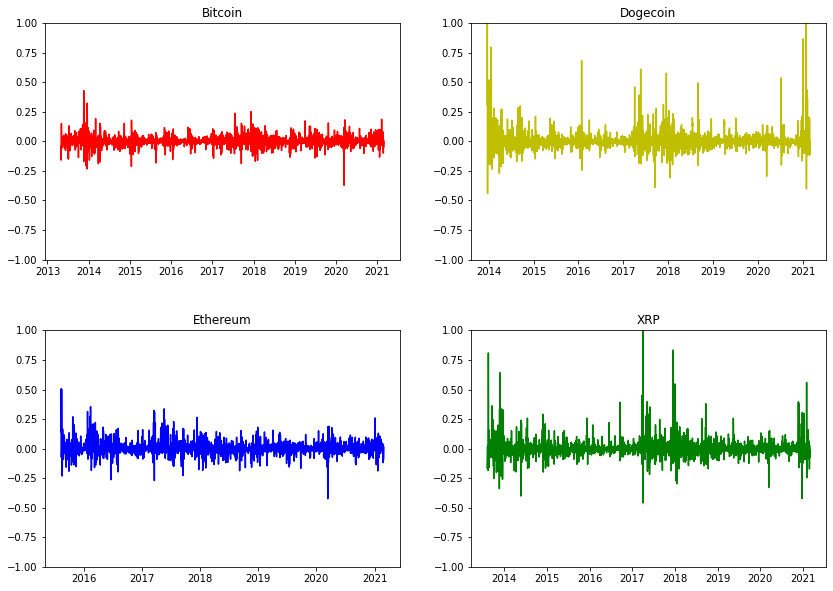

In [9]:
fig, ax = plt.subplots(2,2, figsize=(14,10), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

#  Tweaking and re-using our subplotter function, we'll also re-use the position variables to keep it consistant
def subplotter_pctchange(data, title, pos, color):
    ax[pos].plot(data.Close.pct_change(), c=color,)
    ax[pos].set_title(title)
    ax[pos].set_ylim([-1.0, 1.0])
    plt.show

subplotter_pctchange(btc, 'Bitcoin', btcpos, 'r')
subplotter_pctchange(doge, 'Dogecoin', dogepos, 'y')
subplotter_pctchange(eth, 'Ethereum', ethpos, 'b')
subplotter_pctchange(xrp, 'XRP', xrppos, 'g')

We can view the same data on a histogram 

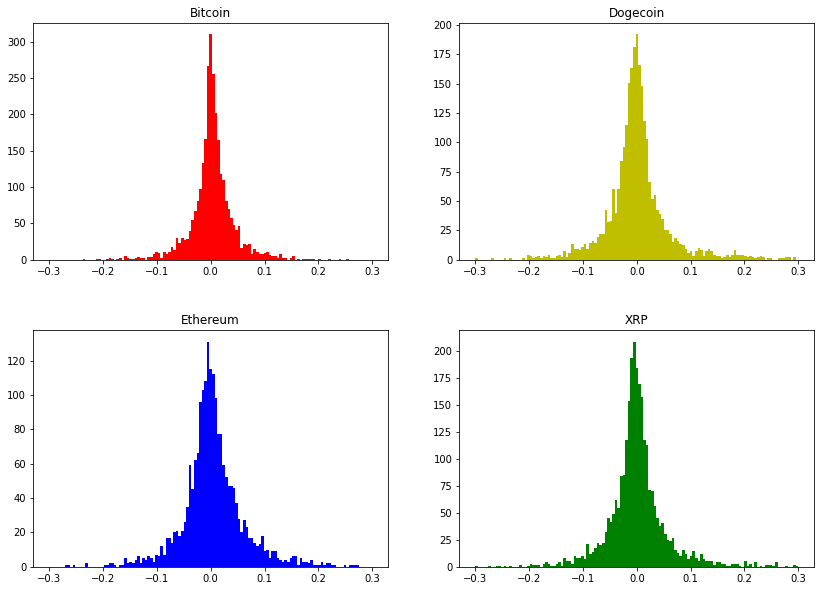

In [10]:
fig, ax = plt.subplots(2,2, figsize=(14,10), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})

#  Tweaking and re-using our subplotter function, we'll also re-use the position variables to keep it consistant
def subplotter_hist(data, title, pos, color):
    ax[pos].hist(data.Close.pct_change(), color=color, bins=125, range=(-0.3, 0.3))
    ax[pos].set_title(title)
    plt.show

subplotter_hist(btc, 'Bitcoin', btcpos, 'r')
subplotter_hist(doge, 'Dogecoin', dogepos, 'y')
subplotter_hist(eth, 'Ethereum', ethpos, 'b')
subplotter_hist(xrp, 'XRP', xrppos, 'g')


We can also show the cumulative returns on these cryptos over their lives to get a good idea of their performance over time. This is a good way of visualizing the growth of each crypto relative to eachother. 

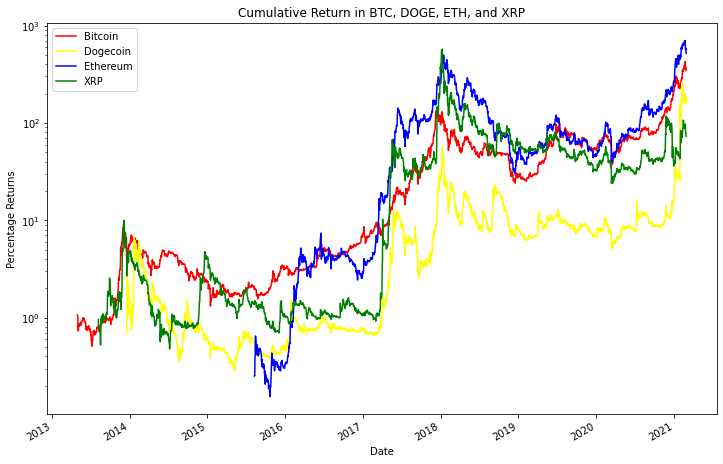

In [11]:
btc_return = btc.Open.pct_change()+1
doge_return = doge.Open.pct_change()+1
eth_return = eth.Open.pct_change()+1
xrp_return = xrp.Open.pct_change()+1
btc_cump = btc_return.cumprod()
doge_cump = doge_return.cumprod()
eth_cump = eth_return.cumprod()
xrp_cump = xrp_return.cumprod()
plt.figure(figsize=(12,8))
btc_cump.plot(c='red')
doge_cump.plot(c='yellow')
eth_cump.plot(c='blue')
xrp_cump.plot(c='green')
plt.title('Cumulative Return in BTC, DOGE, ETH, and XRP')
plt.legend(('Bitcoin','Dogecoin', 'Ethereum', 'XRP'))
plt.yscale('log')
plt.ylabel('Percentage Returns')
plt.show()


Let's take closer look at the data by checking out a specific period of time, I'm going to check out March 1st to May 8th of 2021 because of the recent rise in popularity and adoption of crypto. Our data set's only go up to the end of february so let's pull in some more recent datasets

In [12]:
#  Defining our recent dataframes
btcrecent = pd.read_csv('https://raw.githubusercontent.com/jpp97/cryptoproject/main/btcupdate.csv')
dogerecent = pd.read_csv('https://raw.githubusercontent.com/jpp97/cryptoproject/main/dogeupdate.csv')
ethrecent = pd.read_csv('https://raw.githubusercontent.com/jpp97/cryptoproject/main/ethupdate.csv')
xrprecent = pd.read_csv('https://raw.githubusercontent.com/jpp97/cryptoproject/main/xrpupdate.csv')
cryptorecent = [btcrecent, dogerecent, ethrecent, xrprecent]

#  Changing 'Date' to the datetime format
for i in cryptorecent:
    i['Date'] = pd.to_datetime(i['Date'])

#  Changing the numerical index for our date time so we can index by date
for i in cryptorecent:
    i.set_index('Date', drop=True, inplace=True)
    i.sort_index(inplace=True)

With our new data we can plot candlestick charts to show March 1st to May 8th 2021 for each of our cryptos. I chose candlestick charts for this because with the recent mass adoption of cryptocurrencies many people spend time looking and chart's like this on popular exchanges like Binance, Coinbase, and Robinhood when they are investing into crypto

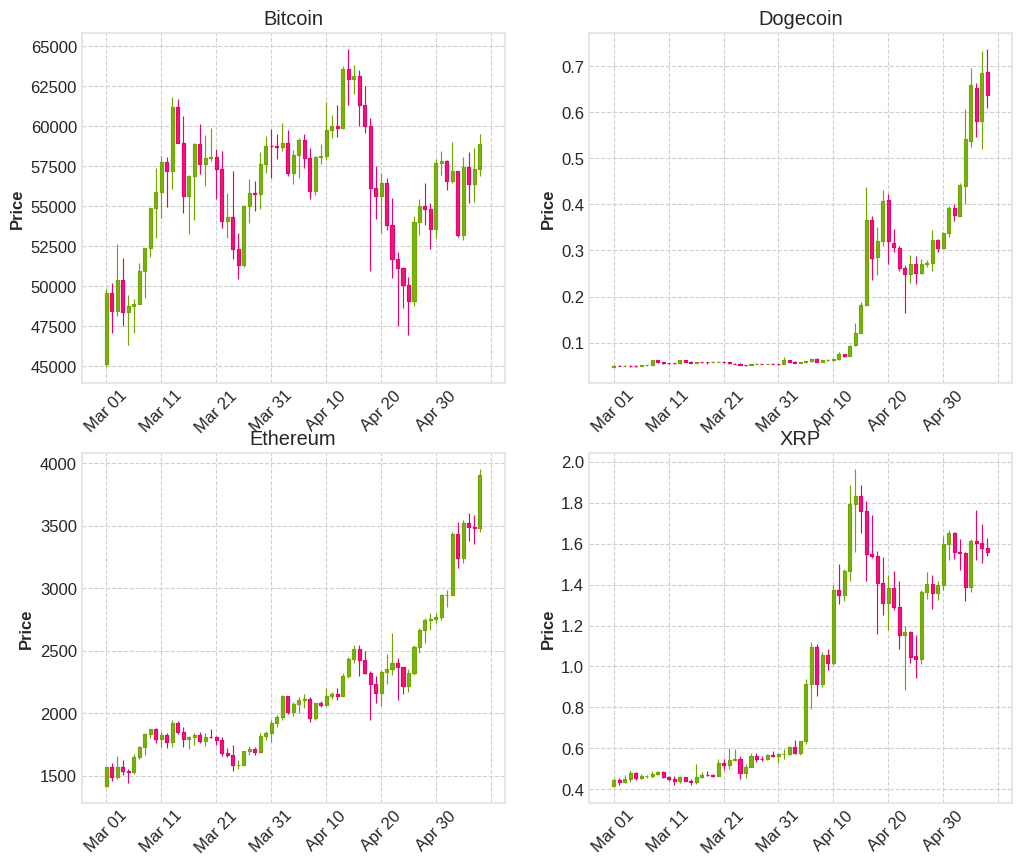

In [13]:
#  Plotting our recent crypto price data with candlestick charts
fig = mpf.figure(figsize=(12, 10), style='binance')
ax1 = fig.add_subplot(2, 2, 1,)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
mpf.plot(btcrecent, ax=ax1, axtitle='Bitcoin', type='candle')
mpf.plot(dogerecent, ax=ax2, axtitle='Dogecoin', type='candle')
mpf.plot(ethrecent, ax=ax3, axtitle='Ethereum', type='candle')
mpf.plot(xrprecent, ax=ax4, axtitle='XRP', type='candle')

The sudden drop in mid April is due to panic from talk of a new capital gains tax

As you can see crypto is doing better than ever, however it still remains a high risk - high reward investment With more accessability, adoption and use many believe the price will eventually stabilize and continue on it's upward trend



We can try to predict our own trend line with fbProphet, a additive regression model designed to detect trends with many different factors


To start this process we will add our recent data to our historical dataframes

In [14]:
#  Here we are combining our more recent dataframe's with our historical dataframe's
btcnew = pd.concat([btc, btcrecent])
dogenew = pd.concat([doge, dogerecent])
ethnew = pd.concat([eth, ethrecent])
xrpnew = pd.concat([xrp, xrprecent])
cryptonew = [btcnew, dogenew, ethnew, xrpnew]

In [16]:
#  Resetting the index so we can easily access the 'Date' column with Prophet
for i in cryptonew:
    i.reset_index(inplace=True)

Next we will start creating our models, since we have 4 different dataframes im just going to create a model training function for simplicity sake. This function will train all the models and then plot the price prediction forecast for each of our cryptos

In [17]:
#  Creating empty prophet objects to put our data sets in
btcm = Prophet()
dogem = Prophet()
ethm = Prophet()
xrpm = Prophet()
cryptomodels = [btcm, dogem, ethm, xrpm]
#  This function will train each of our models, as well as setting the prediction time for the next year
def modeltrainer(name, modelname, title):
    newname = name[['Date', 'Close']]
    newname.columns = ['ds', 'y']
    modelname.fit(newname)
    future = modelname.make_future_dataframe(periods=365, freq='d')
    forecast = modelname.predict(future)
    modelname.plot(forecast, ylabel='Price in USD', xlabel='Year')
    plt.title(title)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


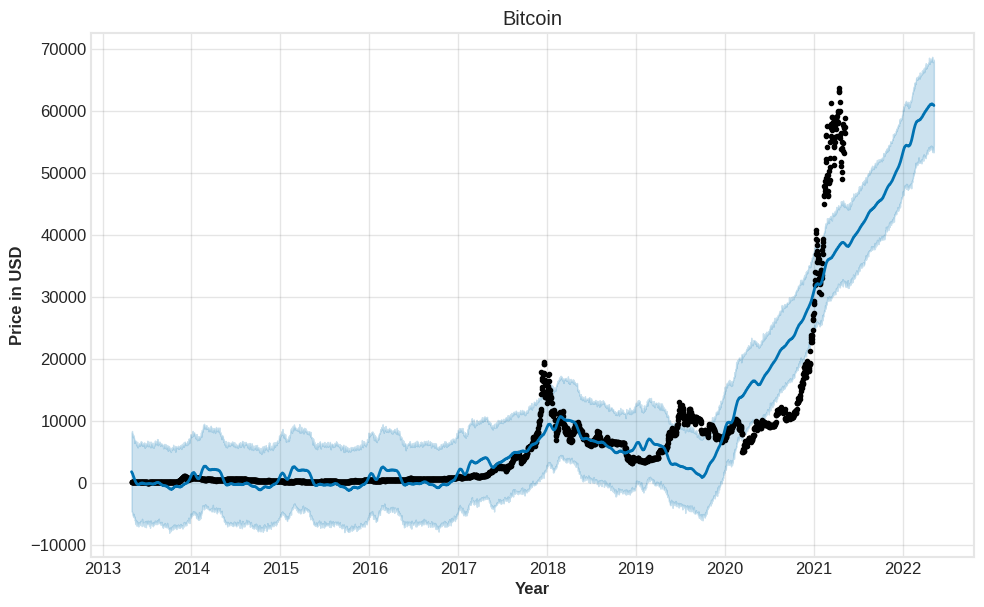

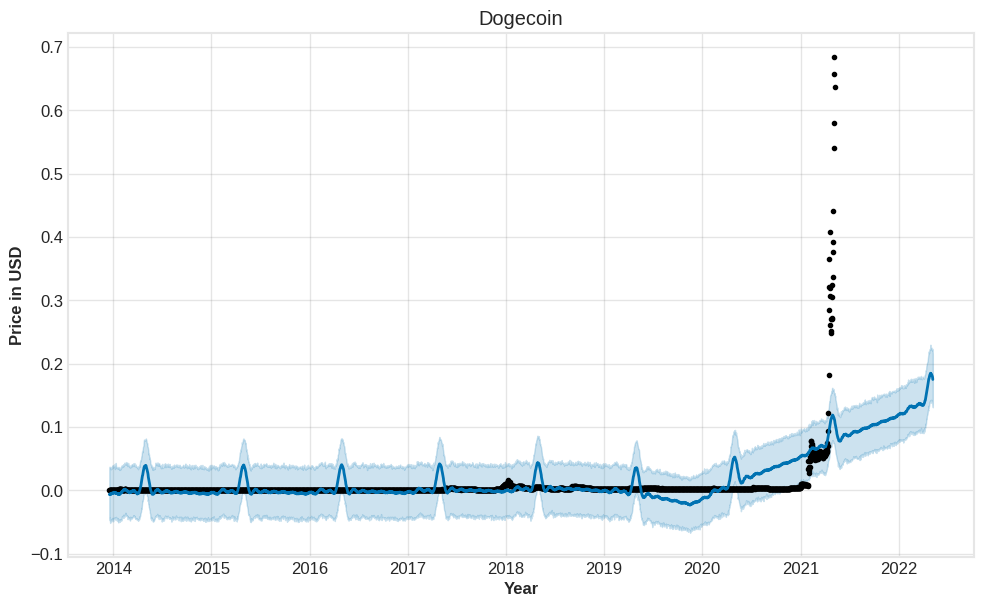

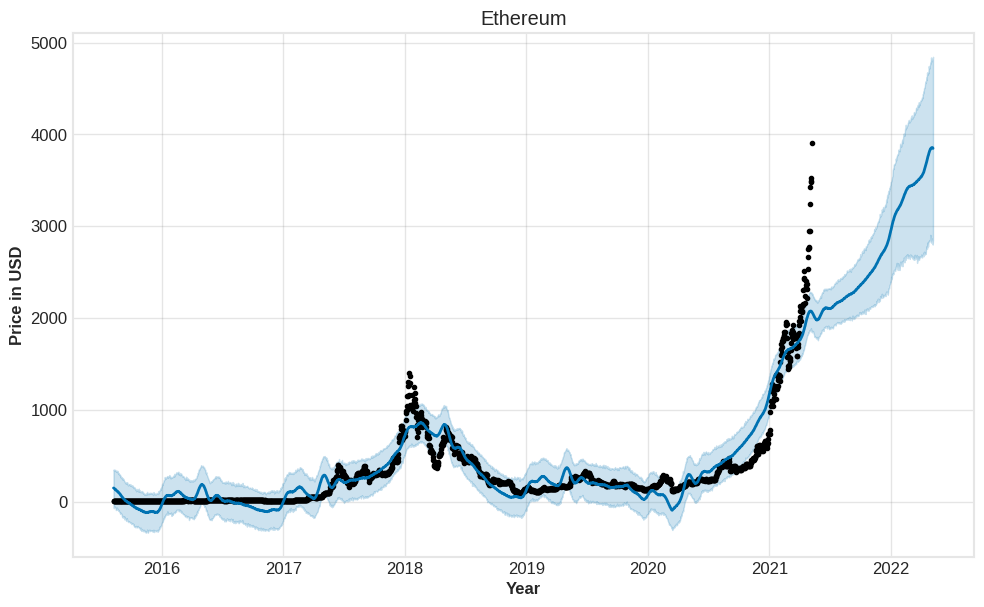

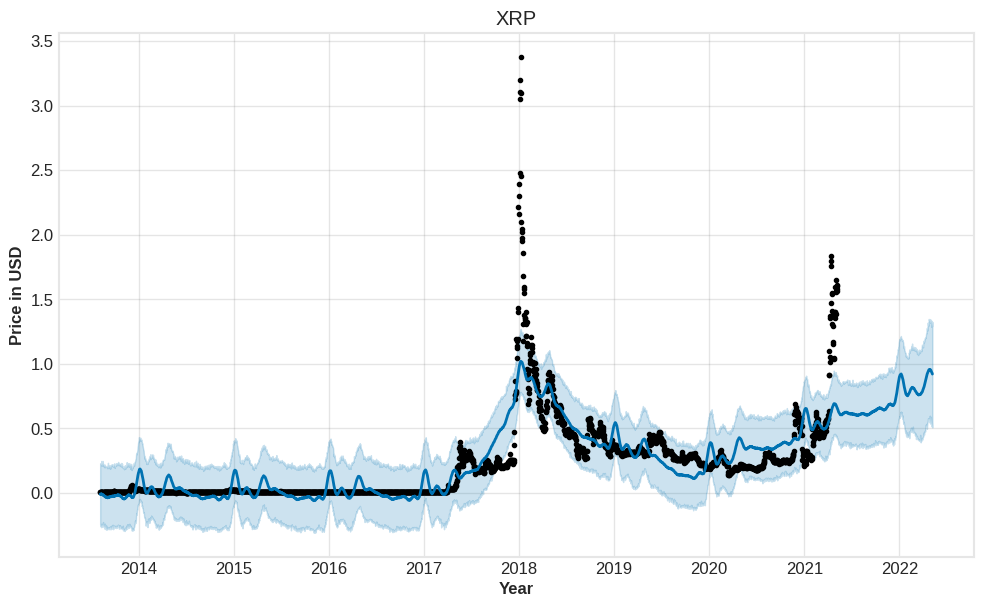

In [18]:
#  Calling our function for each dataframe and passing in a title
modeltrainer(btcnew, btcm, 'Bitcoin')
modeltrainer(dogenew, dogem, 'Dogecoin')
modeltrainer(ethnew, ethm, 'Ethereum')
modeltrainer(xrpnew, xrpm, 'XRP')

The predictions are very interesting, we see consistent growth predicted for Bitcoin and Ethereum. Dogecoin may end up dropping from it's astronomical high and correcting to 20 cents accoring to prophet But after that correction takes place we may see some stable growth from the 20 cent point onward It appears to be the same with XRP, however XRP looks more consolidated and stable As we can see the potential for cryptocurrenies in the next year looks very promising. With our limited historical data on cryptocurrencies it's impossible to get more accurate predictions But as cryptocurrency continues to be developed and adopted by new people everyday things are definitely looking bright based off of the price forecast from fbprophet.

Prophet's trend detection can give those interested in day trading cryptocurrencies some very useful data so let's check that out next.

We'll focus on Bitcoin since it's the most popular cryptocurrency and also the one with the most data.

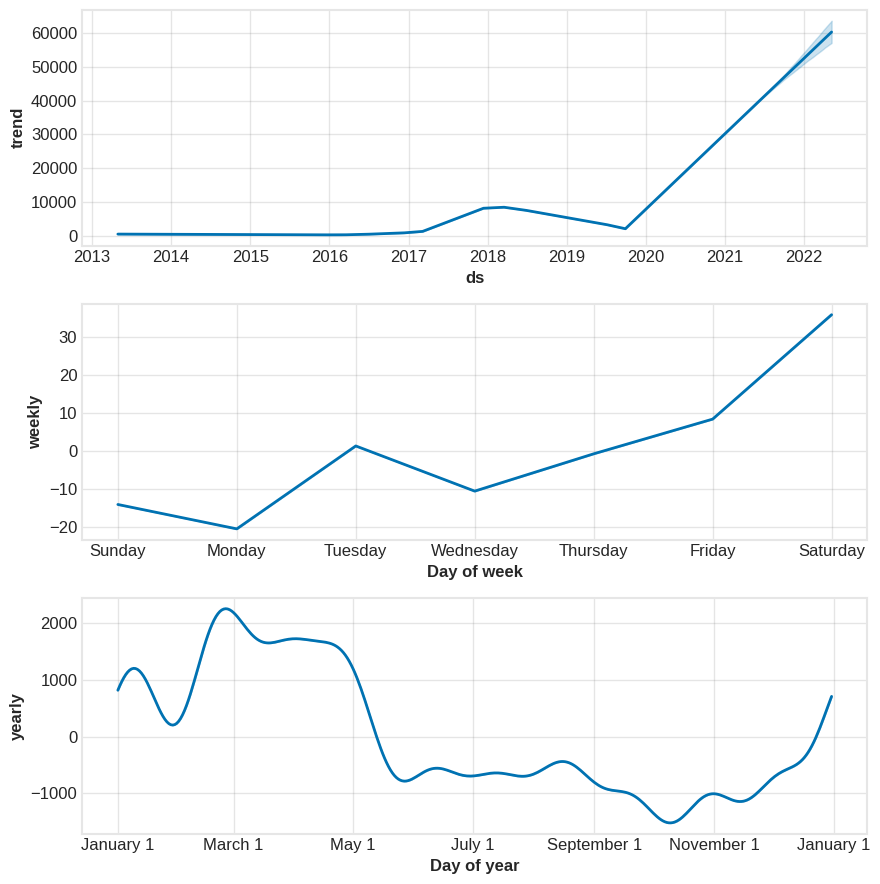

In [19]:
future = btcm.make_future_dataframe(periods=365, freq='d')
forecast = btcm.predict(future)
btcm.plot_components(forecast);


Based off of these trends Bitcoin seems to trade higher in the last few days off the week and trail back down on Sundays and Mondays

To make things interesting we can perform a DOGE forecast using prophet but instead of feeding prophet all of Doge's mostly insignifigant/inactive price data we can just pass in our 'dogerecent' dataframe which only covers March-May 2021 which just so happens to be Dogecoins most active period.

In [20]:
dogcoin = pd.read_csv('https://raw.githubusercontent.com/jpp97/cryptoproject/main/dogeupdate.csv')
print(dogcoin.head(1))
print(dogcoin.tail(1))

         Date     Open      High       Low     Close
0  2021-03-01  0.04807  0.051479  0.048029  0.050599
          Date      Open      High       Low     Close
68  2021-05-08  0.687801  0.737567  0.608168  0.636439


This is the exact timeframe we will use to train the prophet model for a short term price forecast of 30 days

In [21]:
#  Training a new model for our short term doge prediction
m = Prophet()
dogedata = dogcoin[['Date', 'Close']]
dogedata.columns = ['ds', 'y']
m.fit(dogedata)
future = m.make_future_dataframe(periods=30, freq='d')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


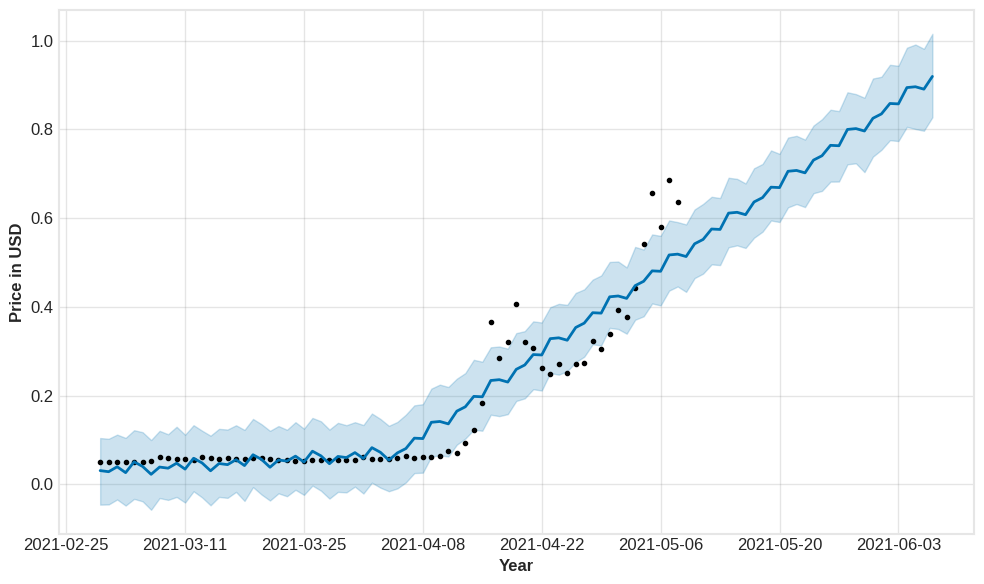

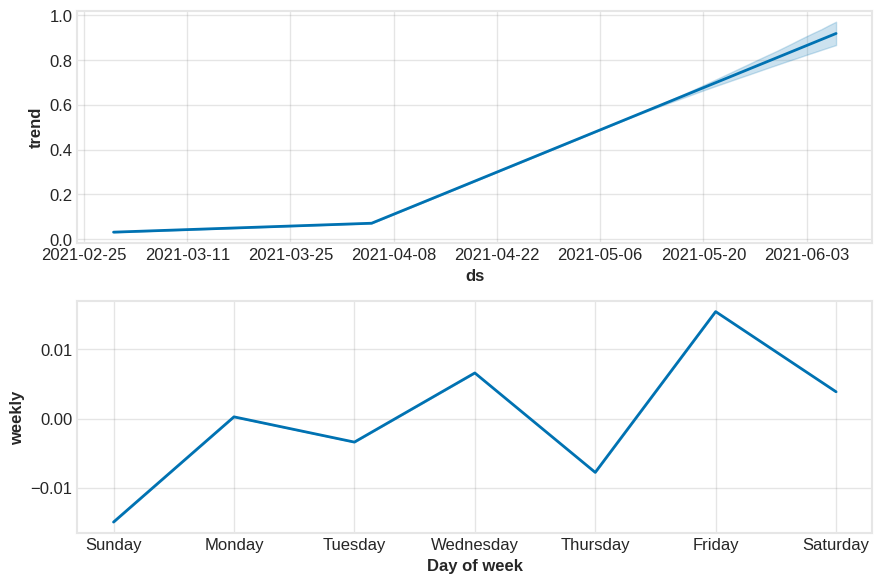

In [22]:
#  Doge 60 day forcast
m.plot(forecast, ylabel='Price in USD', xlabel='Year');
m.plot_components(forecast);

Dogecoin is very interesting, by training with only our recent and incredibly active price data Prophet is now showing Dogecoins potential to hit $1USD by June 2021. With it's recent headlines and growing popularity among young investors this may be a reality even though in terms of technology it is essentially a bitcoin clone

The Ultimate goal of this analysis was to analyze and make observations on the prices of these cryptocurrencies and determine it's value as an investment. The data tells us that cryptocurrency as a whole is incredible volatile and largely unpredictable at the current time, that being said we do also have consistant rising trend lines over their short lives. So as with any investment this is all about the individual risk:reward, how much risk you can take on to justify the potential massive returns crypto much like it has given in the past? That question is only answered by the individual investor and/or financial advisor(which I am not). 

I compared my project to some others that I found on Kaggle with my dataset. Largely we all did alot of the same things, such as general trend lines, high/low prices, volatility and a price prediction. The price predicition area is definitely where I lack the most due to my limited knowledge of prophet and not being able to find too many useful resources, many other people used seaborn which I wish I had the time to try because it seems like I could have done alot more with it.

https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies


This one is made by the person who actually uploaded the data set and I thought it was incredibly helpful in giving me inspiration for my project, this is where I got the idea of using mplfinance and fbprophet.



https://www.kaggle.com/sandhyagopchandani/bitcoin-price-analysis

This data set is also quite good, after reading this analysis is when I wanted to swap to seaborn but I feared it was too late but I figured it's always an improvement I can make on my own time.

I also really enjoyed the correlation between price and other variables

https://www.kaggle.com/andradaolteanu/bitcoin-dogecoin-on-rapids-and-elon-musk

This notebook takes correlation to the next level by going deep into doge coin and the Elon Musk tweets that fuel Dogecoin buying rallies. It's also really fun to read and features alot of memes(makes sense since Dogecoin is based off of a meme)